In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [17]:
df_metabric = pd.read_csv('D:/Rutgers MSDS/Projects/Datasets/Breast Cancer Metabric/Breast Cancer METABRIC.csv')

print(f'METABRIC Dataset Shape: {df_metabric.shape}')
print(f'METABRIC Dataset Memory Usage: {df_metabric.memory_usage().sum() / 1024 ** 2:.2f} MB')

METABRIC Dataset Shape: (2509, 34)
METABRIC Dataset Memory Usage: 0.65 MB


In [18]:
df_metabric.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


# Breast Cancer (METABRIC) Dataset EDA

There are 2,509 unique breast cancer patients in METABRIC dataset as mentioned above. Those patients are diagnosed at ages between 21.9-96.3 and their mean diagnosis age is 60.4. Patients had underwent to two different surgeries; Mastectomy (removal of all breast tissue from a breast) or Breast-conserving surgery (removal of a part of the breast that has cancer). There are 2,506 breast cancer and 3 breast sarcoma patients in the dataset since breast sarcomas are a very rare form of breast cancer, that cover fewer than 1% of all breast cancers. The most common histological subtype of the breast cancer is invasive ductal carcinoma (IDC) with 1865 occurences. IDC is the most common form of breast cancer, representing 80% of all breast cancer diagnoses. Those indicators show that this dataset reflects real world scenarios very accurately.

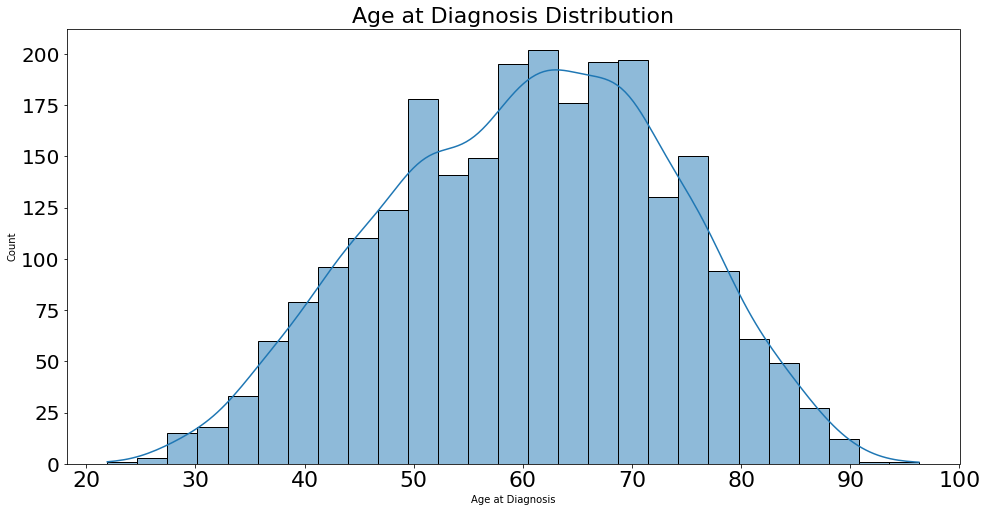

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Age at Diagnosis Distribution
plt.figure(figsize=(16, 8))
sns.histplot(df_metabric['Age at Diagnosis'], kde=True)
plt.title('Age at Diagnosis Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=20)
plt.show()







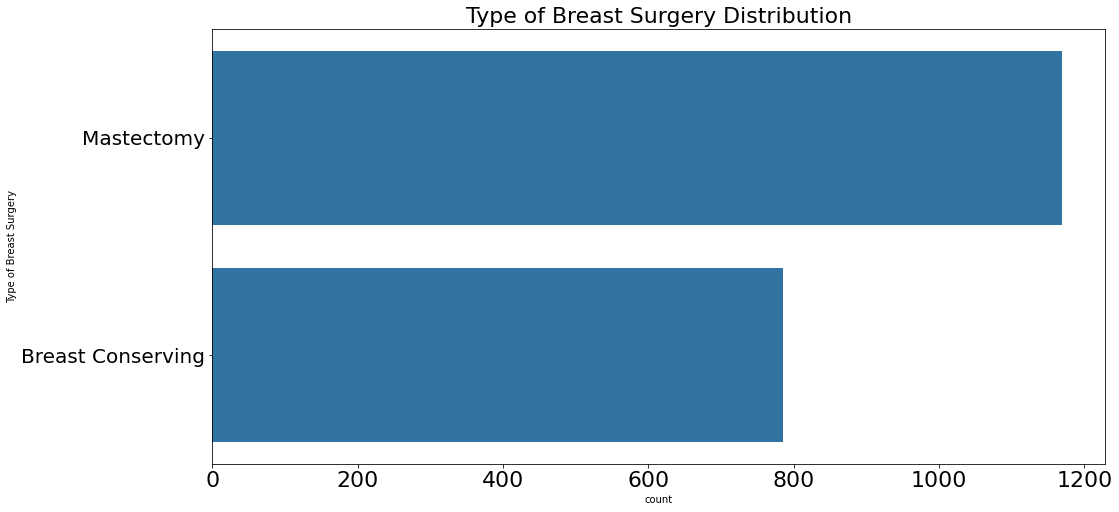

In [10]:
# Plot 2: Type of Breast Surgery Distribution
plt.figure(figsize=(16, 8))
sns.countplot(df_metabric['Type of Breast Surgery'])
plt.title('Type of Breast Surgery Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=20)
plt.show()


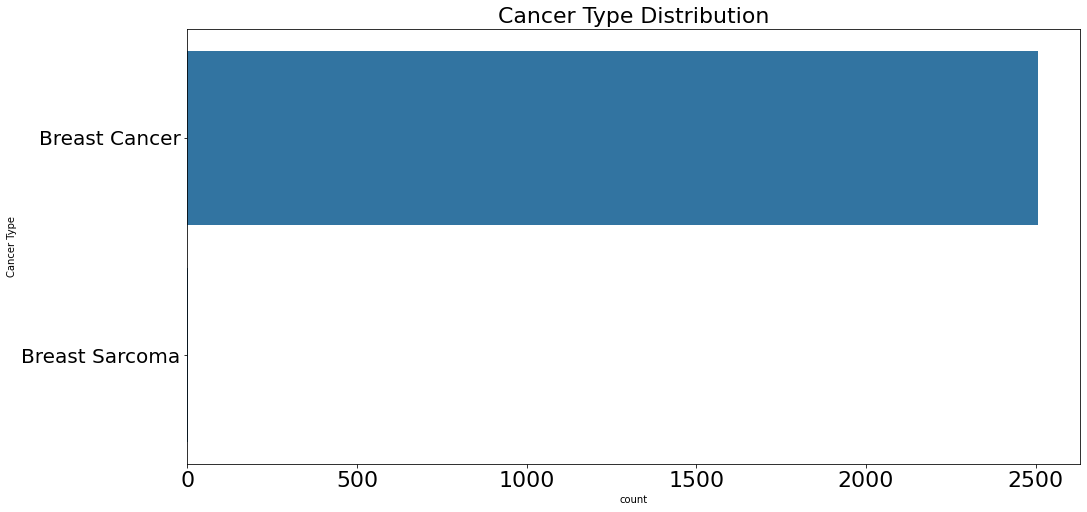

In [11]:
# Plot 3: Cancer Type Distribution
plt.figure(figsize=(16, 8))
sns.countplot(df_metabric['Cancer Type'])
plt.title('Cancer Type Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=20)
plt.show()

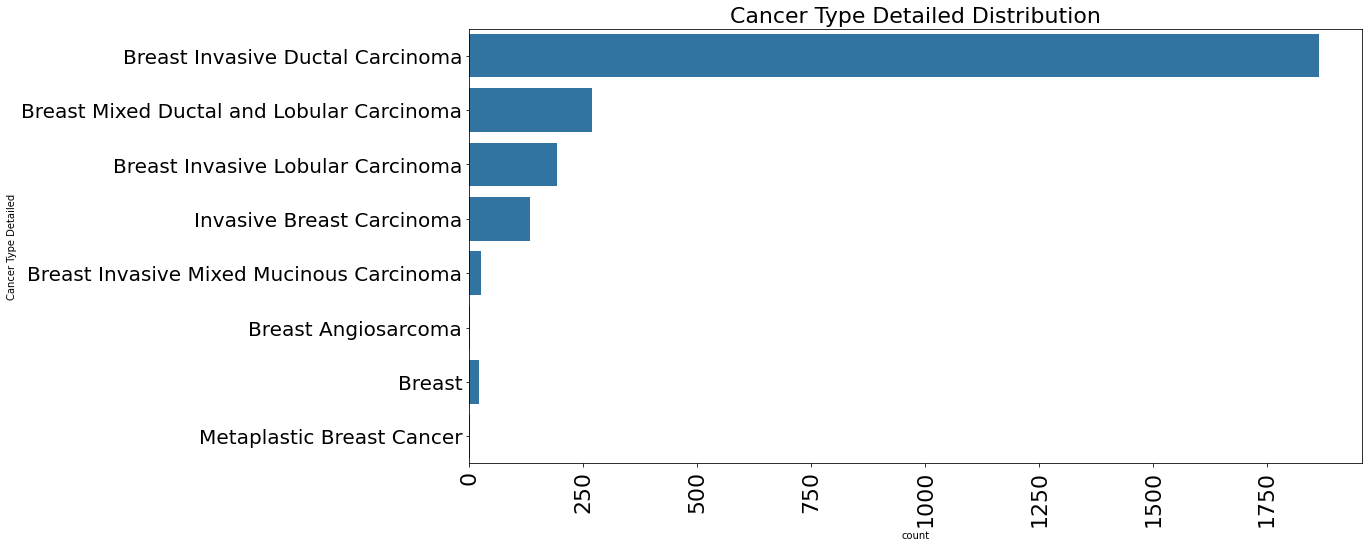

In [12]:
# Plot 4: Cancer Type Detailed Distribution
plt.figure(figsize=(16, 8))
sns.countplot(df_metabric['Cancer Type Detailed'])
plt.title('Cancer Type Detailed Distribution', size=22)
plt.tick_params(axis='x', labelsize=22, rotation=90)
plt.tick_params(axis='y', labelsize=20)
plt.show()

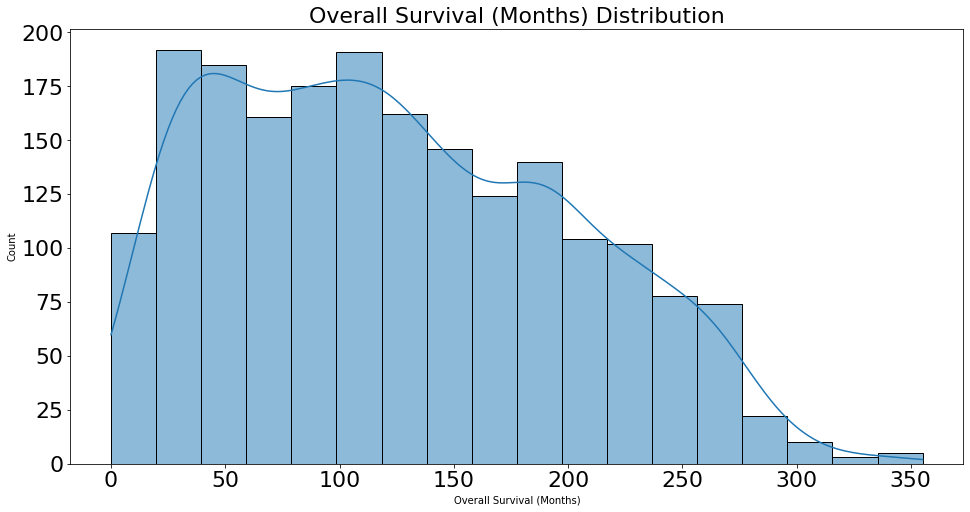

In [13]:
# Plot 1: Overall Survival (Months) Distribution
plt.figure(figsize=(16, 8))
sns.histplot(df_metabric['Overall Survival (Months)'], kde=True)
plt.title('Overall Survival (Months) Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.show()

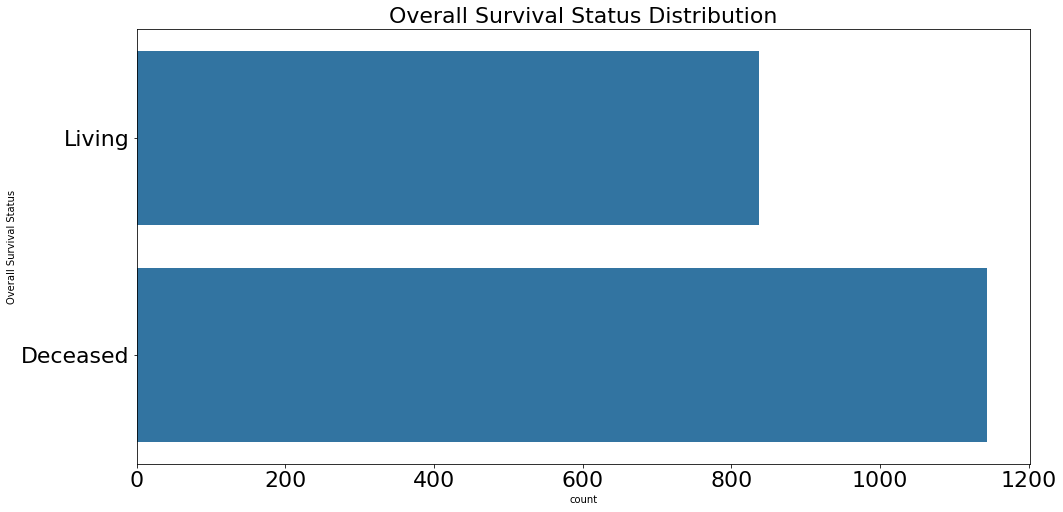

In [14]:
# Plot 2: Overall Survival Status Distribution
plt.figure(figsize=(16, 8))
sns.countplot(df_metabric['Overall Survival Status'])
plt.title('Overall Survival Status Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.show()

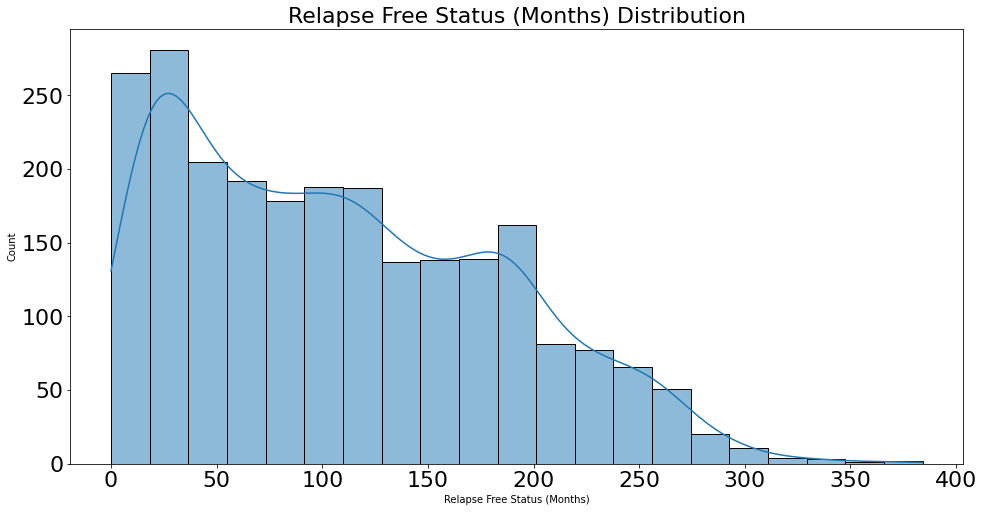

In [15]:
# Plot 3: Relapse Free Status (Months) Distribution
plt.figure(figsize=(16, 8))
sns.histplot(df_metabric['Relapse Free Status (Months)'], kde=True)
plt.title('Relapse Free Status (Months) Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.show()

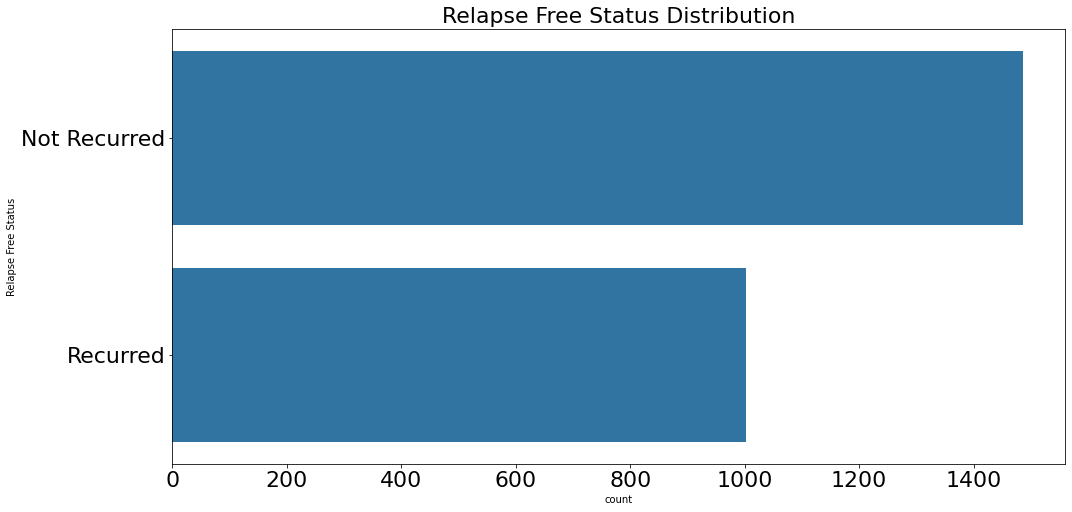

In [16]:
# Plot 4: Relapse Free Status Distribution
plt.figure(figsize=(16, 8))
sns.countplot(df_metabric['Relapse Free Status'])
plt.title('Relapse Free Status Distribution', size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.show()

C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_17628\4209699922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metabric.isnull().sum().sort_values(ascending=False).values,


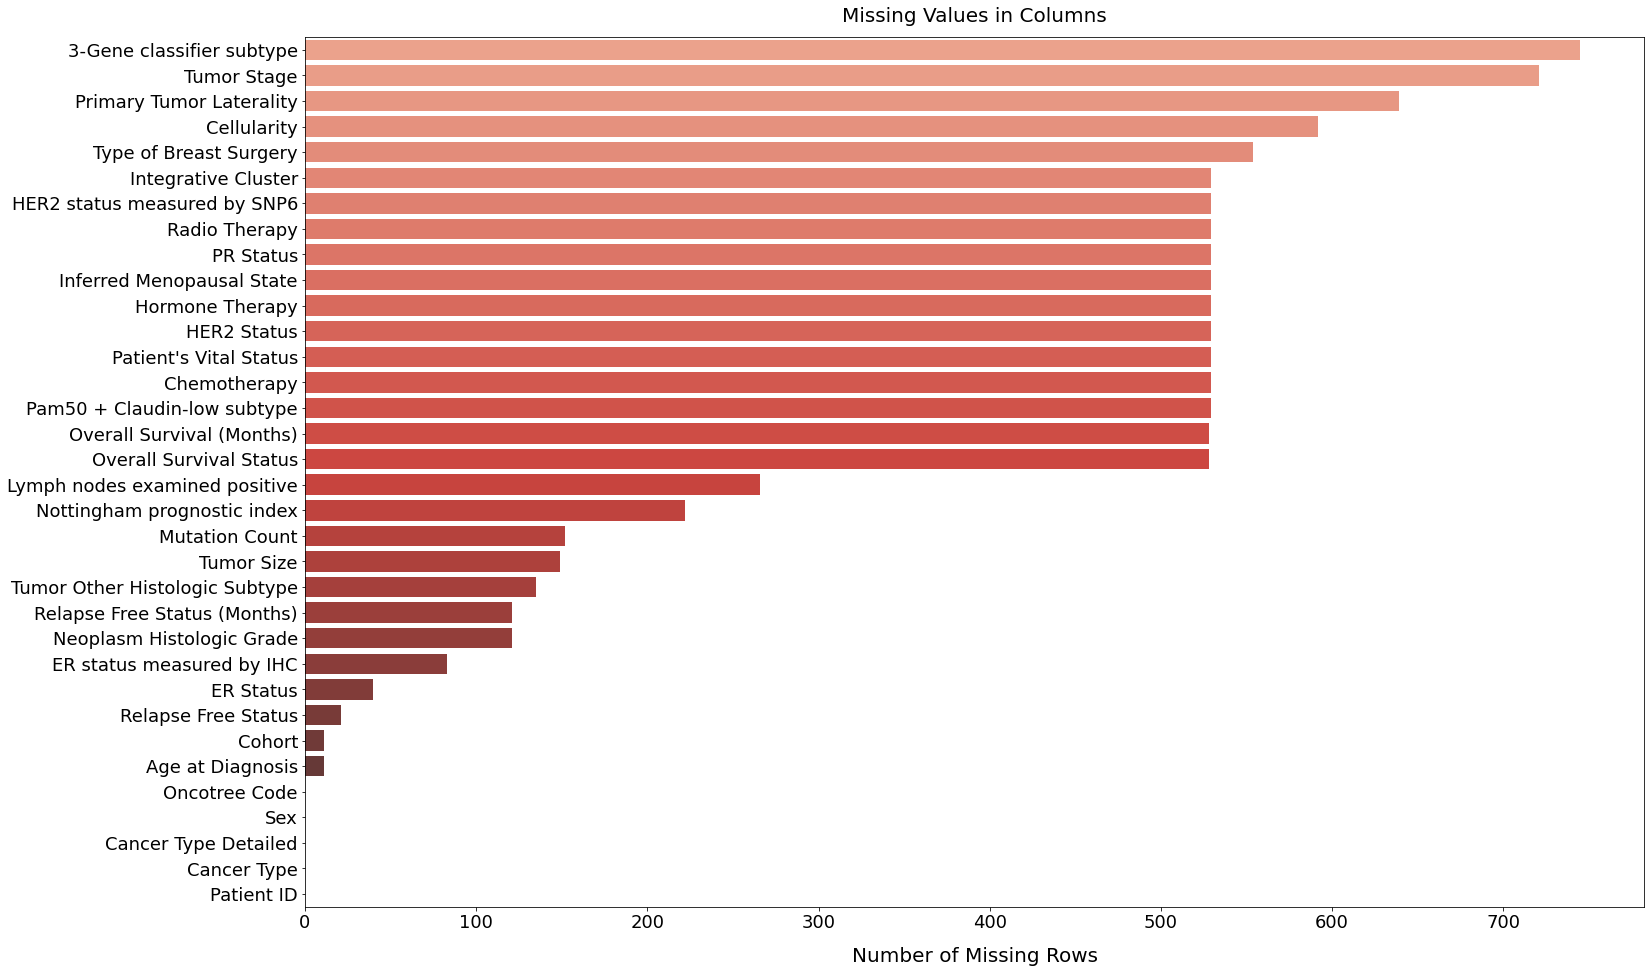

In [20]:
fig = plt.figure(figsize=(24, 16))

sns.barplot(x=df_metabric.isnull().sum().sort_values(ascending=False).values,
            y=df_metabric.isnull().sum().sort_values(ascending=False).index,
            palette='Reds_d')

plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()

In [29]:
import pandas as pd

def safe_mode(series):
    if series.isna().all():
        return None  # Return None if all values are NaN
    mode_value = series.mode()
    return mode_value.iloc[0] if not mode_value.empty else series.median()  # Return median if mode is empty
# Assuming df_metabric is your DataFrame

# Apply safe_mode and other operations with groupby
df_metabric['Relapse Free Status'] = df_metabric.groupby(['Cancer Type Detailed'])['Relapse Free Status'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Relapse Free Status (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].transform(lambda x: x.fillna(x.mean()))
df_metabric['Overall Survival Status'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Overall Survival (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].transform(lambda x: x.fillna(x.mean()))

df_metabric['ER status measured by IHC'] = df_metabric['ER status measured by IHC'].fillna(safe_mode(df_metabric['ER status measured by IHC']))
df_metabric['ER Status'] = df_metabric.groupby(['ER status measured by IHC'])['ER Status'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['HER2 status measured by SNP6'] = df_metabric['HER2 status measured by SNP6'].fillna(safe_mode(df_metabric['HER2 status measured by SNP6']))
df_metabric['HER2 Status'] = df_metabric.groupby(['HER2 status measured by SNP6'])['HER2 Status'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['PR Status'] = df_metabric.groupby(['Cancer Type Detailed'])['PR Status'].transform(lambda x: x.fillna(safe_mode(x)))

df_metabric['Chemotherapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Chemotherapy'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Hormone Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Hormone Therapy'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Radio Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Radio Therapy'].transform(lambda x: x.fillna(safe_mode(x)))

df_metabric['Age at Diagnosis'] = df_metabric.groupby(['Cancer Type Detailed'])['Age at Diagnosis'].transform(lambda x: x.fillna(x.mean()))
df_metabric['Cohort'] = df_metabric.groupby(['Cancer Type Detailed'])['Cohort'].transform(lambda x: x.fillna(x.median()))
df_metabric['Cellularity'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Tumor Stage'] = df_metabric.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].transform(lambda x: x.fillna(x.median()))
df_metabric['Tumor Stage'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Stage'].transform(lambda x: x.fillna(x.median()))
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].transform(lambda x: x.fillna(x.median()))
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Size'].transform(lambda x: x.fillna(x.median()))
df_metabric['Tumor Size'] = df_metabric['Tumor Size'].fillna(safe_mode(df_metabric['Tumor Size']))
df_metabric['Neoplasm Histologic Grade'] = df_metabric.groupby(['Cancer Type Detailed'])['Neoplasm Histologic Grade'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Neoplasm Histologic Grade'] = df_metabric['Neoplasm Histologic Grade'].fillna(safe_mode(df_metabric['Neoplasm Histologic Grade']))
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Tumor Other Histologic Subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Tumor Other Histologic Subtype'] = df_metabric['Tumor Other Histologic Subtype'].fillna('Ductal/NST')
df_metabric['Mutation Count'] = df_metabric.groupby(['Cancer Type Detailed'])['Mutation Count'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Mutation Count'] = df_metabric['Mutation Count'].fillna(safe_mode(df_metabric['Mutation Count']))
df_metabric['Nottingham prognostic index'] = df_metabric.groupby(['Tumor Size'])['Nottingham prognostic index'].transform(lambda x: x.fillna(x.median()))
df_metabric['Nottingham prognostic index'] = df_metabric['Nottingham prognostic index'].fillna(df_metabric['Nottingham prognostic index'].median())
df_metabric['Lymph nodes examined positive'] = df_metabric.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Lymph nodes examined positive'] = df_metabric['Lymph nodes examined positive'].fillna(safe_mode(df_metabric['Lymph nodes examined positive']))
df_metabric['Inferred Menopausal State'] = df_metabric['Inferred Menopausal State'].fillna(safe_mode(df_metabric['Inferred Menopausal State']))
df_metabric['Pam50 + Claudin-low subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Integrative Cluster'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Type of Breast Surgery'] = df_metabric.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(lambda x: x.fillna(safe_mode(x)))
df_metabric['3-Gene classifier subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['3-Gene classifier subtype'].transform(lambda x: x.fillna(safe_mode(x)))

# Drop the 'Patient's Vital Status' column
df_metabric.drop(columns=["Patient's Vital Status"], inplace=True)


ValueError: Must specify a fill 'value' or 'method'.

In [30]:
import pandas as pd

# Define a function to fill missing values with the mode or median
def fill_with_mode_or_median(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value.iloc[0])
    else:
        if series.isna().all():
            return series.fillna(0)  # Or any other default value you see fit
        return series.fillna(series.median())

# Assuming df_metabric is your DataFrame

# Apply fill_with_mode_or_median and other operations with groupby
df_metabric['Relapse Free Status'] = df_metabric.groupby(['Cancer Type Detailed'])['Relapse Free Status'].transform(fill_with_mode_or_median)
df_metabric['Relapse Free Status (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].transform(lambda x: x.fillna(x.mean()))
df_metabric['Overall Survival Status'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].transform(fill_with_mode_or_median)
df_metabric['Overall Survival (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].transform(lambda x: x.fillna(x.mean()))

# Repeat the pattern for other columns
df_metabric['ER status measured by IHC'] = df_metabric['ER status measured by IHC'].transform(fill_with_mode_or_median)
df_metabric['ER Status'] = df_metabric.groupby(['ER status measured by IHC'])['ER Status'].transform(fill_with_mode_or_median)
df_metabric['HER2 status measured by SNP6'] = df_metabric['HER2 status measured by SNP6'].transform(fill_with_mode_or_median)
df_metabric['HER2 Status'] = df_metabric.groupby(['HER2 status measured by SNP6'])['HER2 Status'].transform(fill_with_mode_or_median)
df_metabric['PR Status'] = df_metabric.groupby(['Cancer Type Detailed'])['PR Status'].transform(fill_with_mode_or_median)

df_metabric['Chemotherapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Chemotherapy'].transform(fill_with_mode_or_median)
df_metabric['Hormone Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Hormone Therapy'].transform(fill_with_mode_or_median)
df_metabric['Radio Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Radio Therapy'].transform(fill_with_mode_or_median)

df_metabric['Age at Diagnosis'] = df_metabric.groupby(['Cancer Type Detailed'])['Age at Diagnosis'].transform(lambda x: x.fillna(x.mean()))
df_metabric['Cohort'] = df_metabric.groupby(['Cancer Type Detailed'])['Cohort'].transform(lambda x: x.fillna(x.median()))
df_metabric['Cellularity'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].transform(fill_with_mode_or_median)
df_metabric['Tumor Stage'] = df_metabric.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].transform(lambda x: x.fillna(x.median()))
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].transform(lambda x: x.fillna(x.median()))
df_metabric['Neoplasm Histologic Grade'] = df_metabric.groupby(['Cancer Type Detailed'])['Neoplasm Histologic Grade'].transform(fill_with_mode_or_median)
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(fill_with_mode_or_median)
df_metabric['Tumor Other Histologic Subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].transform(fill_with_mode_or_median)
df_metabric['Mutation Count'] = df_metabric.groupby(['Cancer Type Detailed'])['Mutation Count'].transform(fill_with_mode_or_median)
df_metabric['Nottingham prognostic index'] = df_metabric.groupby(['Tumor Size'])['Nottingham prognostic index'].transform(lambda x: x.fillna(x.median()))
df_metabric['Lymph nodes examined positive'] = df_metabric.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].transform(fill_with_mode_or_median)
df_metabric['Inferred Menopausal State'] = df_metabric['Inferred Menopausal State'].transform(fill_with_mode_or_median)
df_metabric['Pam50 + Claudin-low subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].transform(fill_with_mode_or_median)
df_metabric['Integrative Cluster'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].transform(fill_with_mode_or_median)
df_metabric['Type of Breast Surgery'] = df_metabric.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].transform(fill_with_mode_or_median)
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(fill_with_mode_or_median)
df_metabric['3-Gene classifier subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['3-Gene classifier subtype'].transform(fill_with_mode_or_median)

# Drop the 'Patient's Vital Status' column
df_metabric.drop(columns=["Patient's Vital Status"], inplace=True)


C:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

In [33]:
import pandas as pd
import numpy as np

# Function to fill missing values with mode or median
def fill_with_mode_or_median(series):
    if series.isna().all():
        return series.fillna(0)  # Replace 0 with a default value as needed
    mode_value = series.mode()
    return series.fillna(mode_value.iloc[0] if not mode_value.empty else series.median())

# Function to fill missing values with mean or a default value
def fill_mean_or_default(series):
    if series.isna().all():
        return series.fillna(0)  # Replace 0 with a default value as needed
    return series.fillna(series.mean())

# Assuming df_metabric is your DataFrame

# Apply fill_with_mode_or_median for categorical columns and fill_mean_or_default for numerical columns
df_metabric['Relapse Free Status'] = df_metabric.groupby(['Cancer Type Detailed'])['Relapse Free Status'].transform(fill_with_mode_or_median)
df_metabric['Relapse Free Status (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].transform(fill_mean_or_default)
df_metabric['Overall Survival Status'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].transform(fill_with_mode_or_median)
df_metabric['Overall Survival (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].transform(fill_mean_or_default)

# Repeat the pattern for other columns
df_metabric['ER status measured by IHC'] = df_metabric['ER status measured by IHC'].transform(fill_with_mode_or_median)
df_metabric['ER Status'] = df_metabric.groupby(['ER status measured by IHC'])['ER Status'].transform(fill_with_mode_or_median)
df_metabric['HER2 status measured by SNP6'] = df_metabric['HER2 status measured by SNP6'].transform(fill_with_mode_or_median)
df_metabric['HER2 Status'] = df_metabric.groupby(['HER2 status measured by SNP6'])['HER2 Status'].transform(fill_with_mode_or_median)
df_metabric['PR Status'] = df_metabric.groupby(['Cancer Type Detailed'])['PR Status'].transform(fill_with_mode_or_median)

df_metabric['Chemotherapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Chemotherapy'].transform(fill_with_mode_or_median)
df_metabric['Hormone Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Hormone Therapy'].transform(fill_with_mode_or_median)
df_metabric['Radio Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Radio Therapy'].transform(fill_with_mode_or_median)

df_metabric['Age at Diagnosis'] = df_metabric.groupby(['Cancer Type Detailed'])['Age at Diagnosis'].transform(fill_mean_or_default)
df_metabric['Cohort'] = df_metabric.groupby(['Cancer Type Detailed'])['Cohort'].transform(fill_mean_or_default)
df_metabric['Cellularity'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].transform(fill_with_mode_or_median)
df_metabric['Tumor Stage'] = df_metabric.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].transform(fill_mean_or_default)
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].transform(fill_mean_or_default)
df_metabric['Neoplasm Histologic Grade'] = df_metabric.groupby(['Cancer Type Detailed'])['Neoplasm Histologic Grade'].transform(fill_with_mode_or_median)
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(fill_with_mode_or_median)
df_metabric['Tumor Other Histologic Subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].transform(fill_with_mode_or_median)
df_metabric['Mutation Count'] = df_metabric.groupby(['Cancer Type Detailed'])['Mutation Count'].transform(fill_mean_or_default)
df_metabric['Nottingham prognostic index'] = df_metabric.groupby(['Tumor Size'])['Nottingham prognostic index'].transform(fill_mean_or_default)
df_metabric['Lymph nodes examined positive'] = df_metabric.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].transform(fill_mean_or_default)
df_metabric['Inferred Menopausal State'] = df_metabric['Inferred Menopausal State'].transform(fill_with_mode_or_median)
df_metabric['Pam50 + Claudin-low subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].transform(fill_with_mode_or_median)
df_metabric['Integrative Cluster'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].transform(fill_with_mode_or_median)
df_metabric['Type of Breast Surgery'] = df_metabric.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].transform(fill_with_mode_or_median)
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(fill_with_mode_or_median)
df_metabric['3-Gene classifier subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['3-Gene classifier subtype'].transform(fill_with_mode_or_median)



In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_metabric is your DataFrame

object_cols = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity',
               'Chemotherapy', 'Pam50 + Claudin-low subtype', 'ER status measured by IHC',
               'ER Status', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype',
               'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality',
               'Oncotree Code', 'PR Status', 'Radio Therapy', 'Sex', '3-Gene classifier subtype']

# Convert each column in object_cols to string and then apply LabelEncoder
for col in object_cols:
    df_metabric[col] = LabelEncoder().fit_transform(df_metabric[col].astype(str))

# Map 'Overall Survival Status' and 'Relapse Free Status' to numerical values
df_metabric['Overall Survival Status'] = df_metabric['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}).astype(np.uint8)
df_metabric['Relapse Free Status'] = df_metabric['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}).astype(np.uint8)


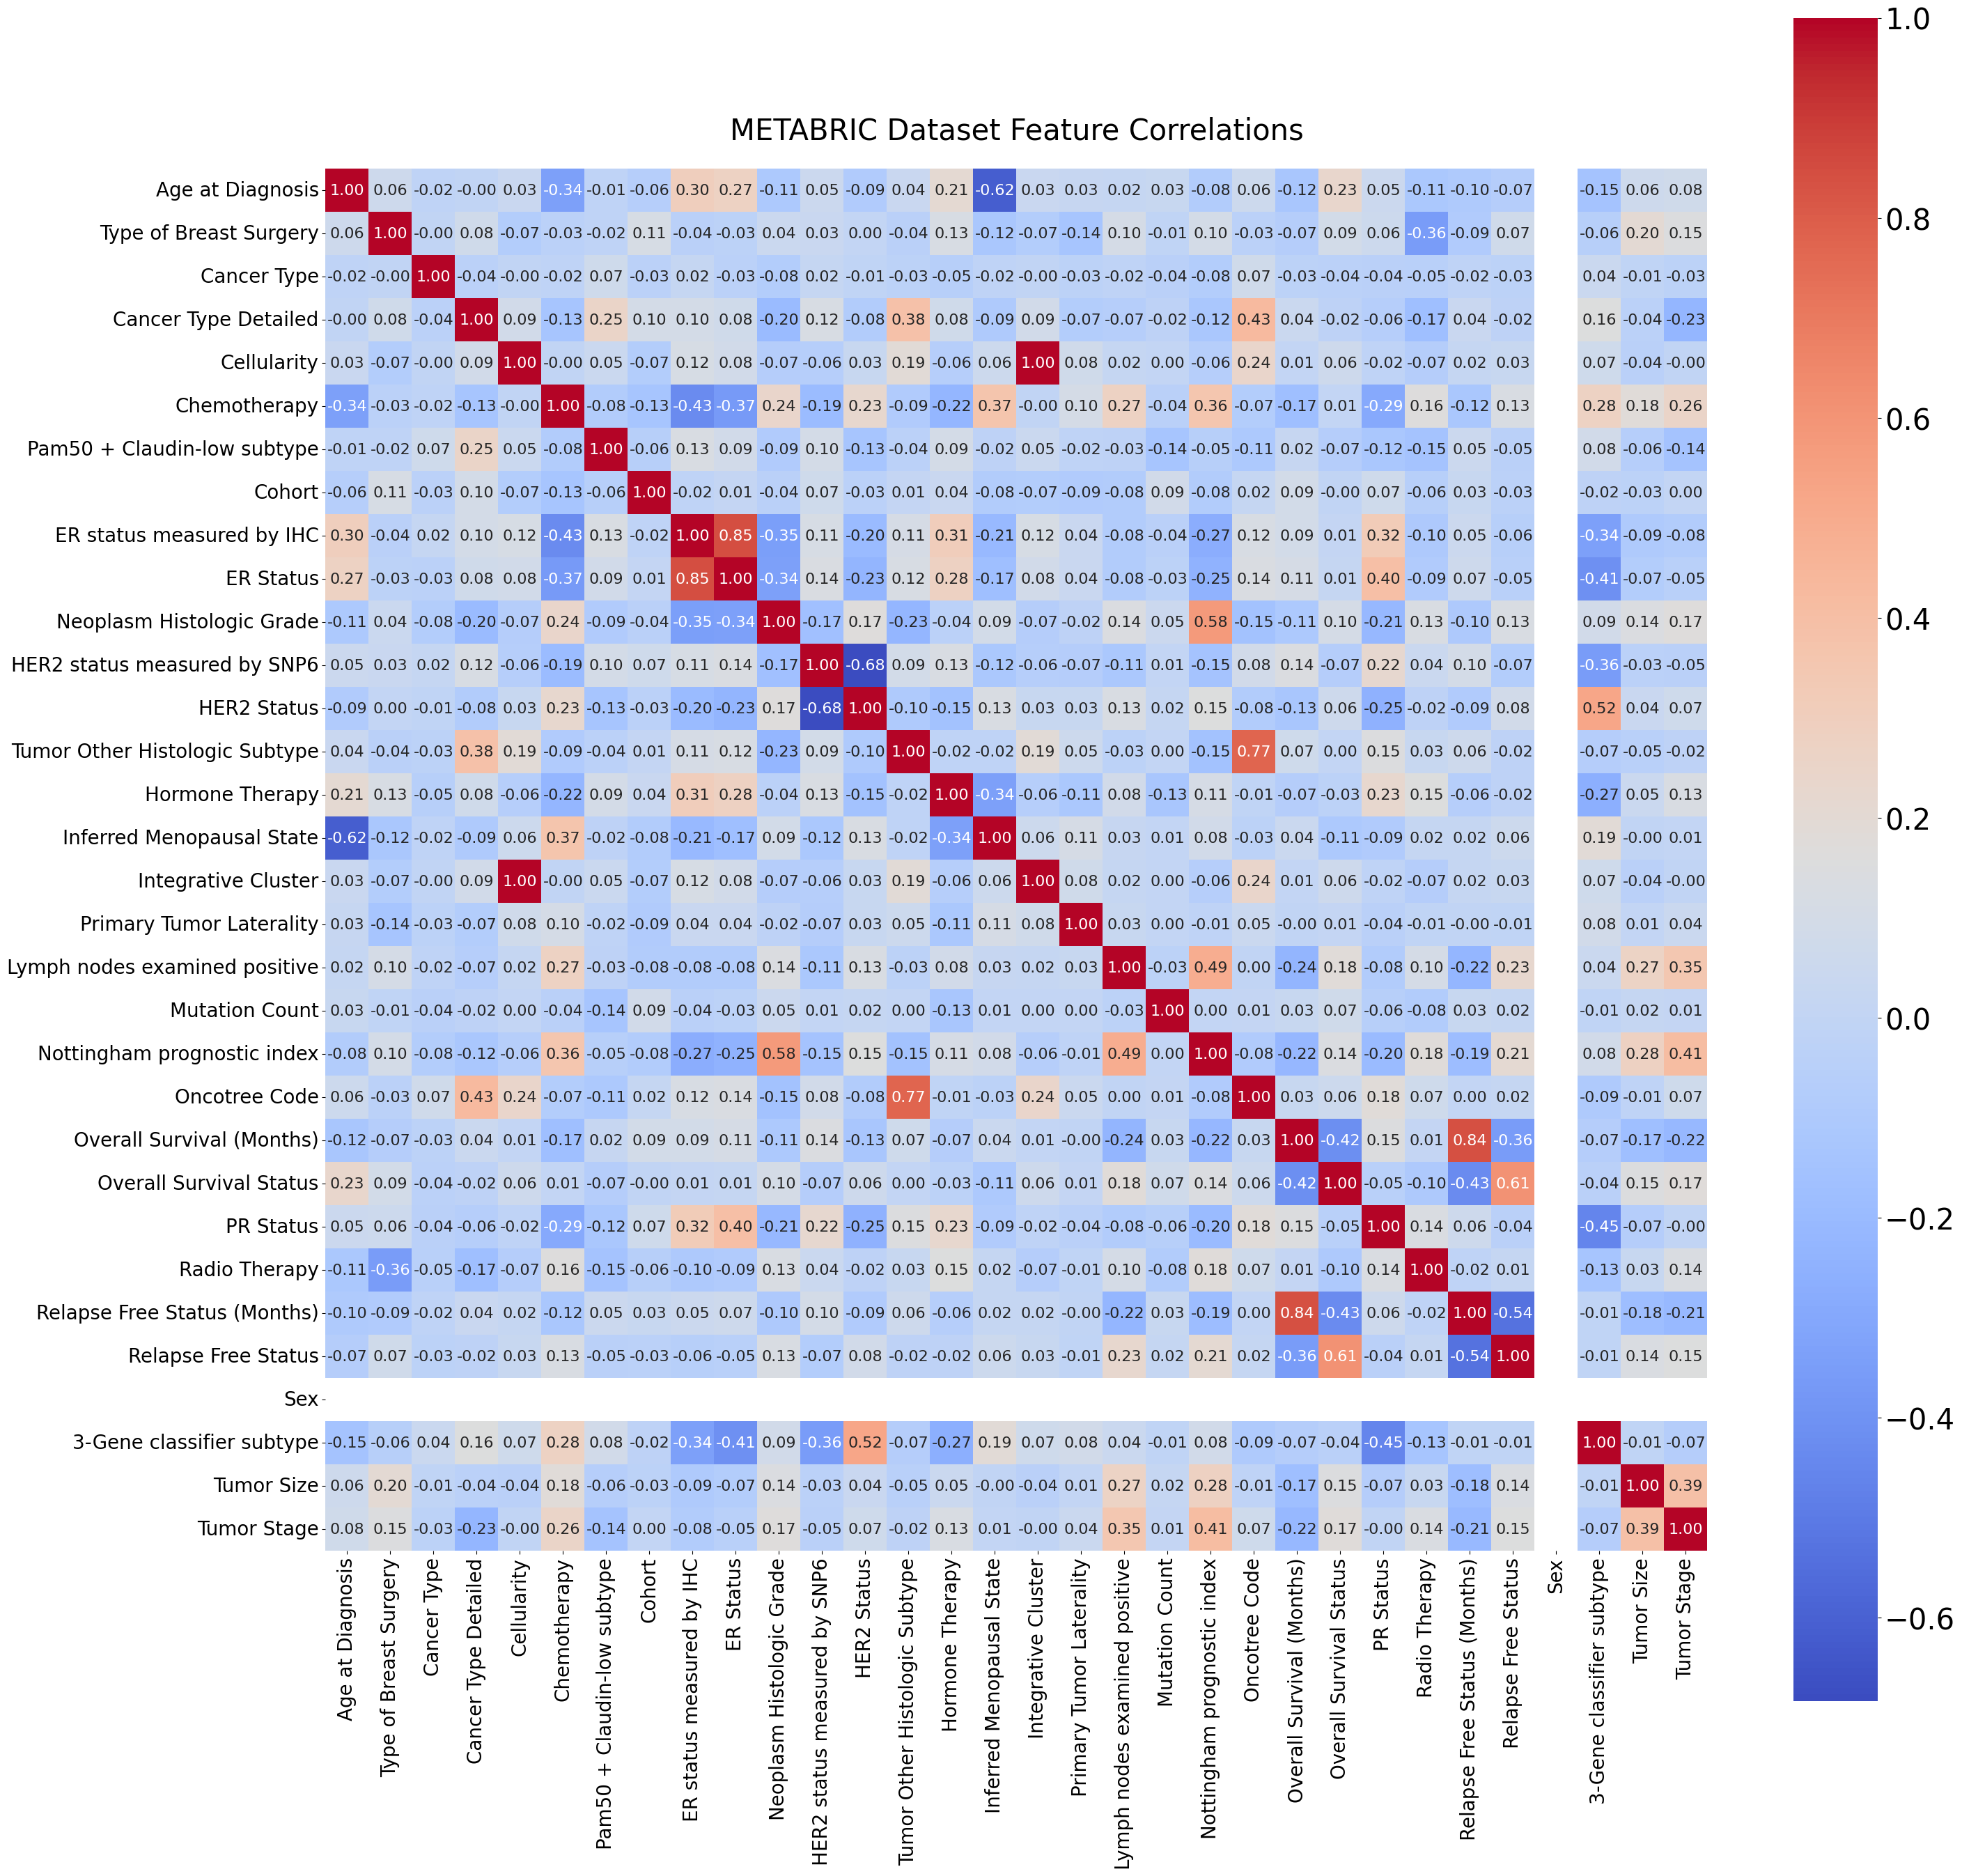

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_metabric is your DataFrame

# Select only numeric columns for correlation calculation
numeric_cols = df_metabric.select_dtypes(include=[np.number]).columns
corr_matrix = df_metabric[numeric_cols].corr()

# Plotting the heatmap
fig = plt.figure(figsize=(32, 32), dpi=100)
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 16}, fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

plt.tick_params(axis='x', labelsize=20, rotation=90)
plt.tick_params(axis='y', labelsize=20, rotation=0)
plt.title('METABRIC Dataset Feature Correlations', size=30, pad=30)

plt.show()


In [40]:
df_metabric.drop(columns=['Integrative Cluster'], inplace=True)

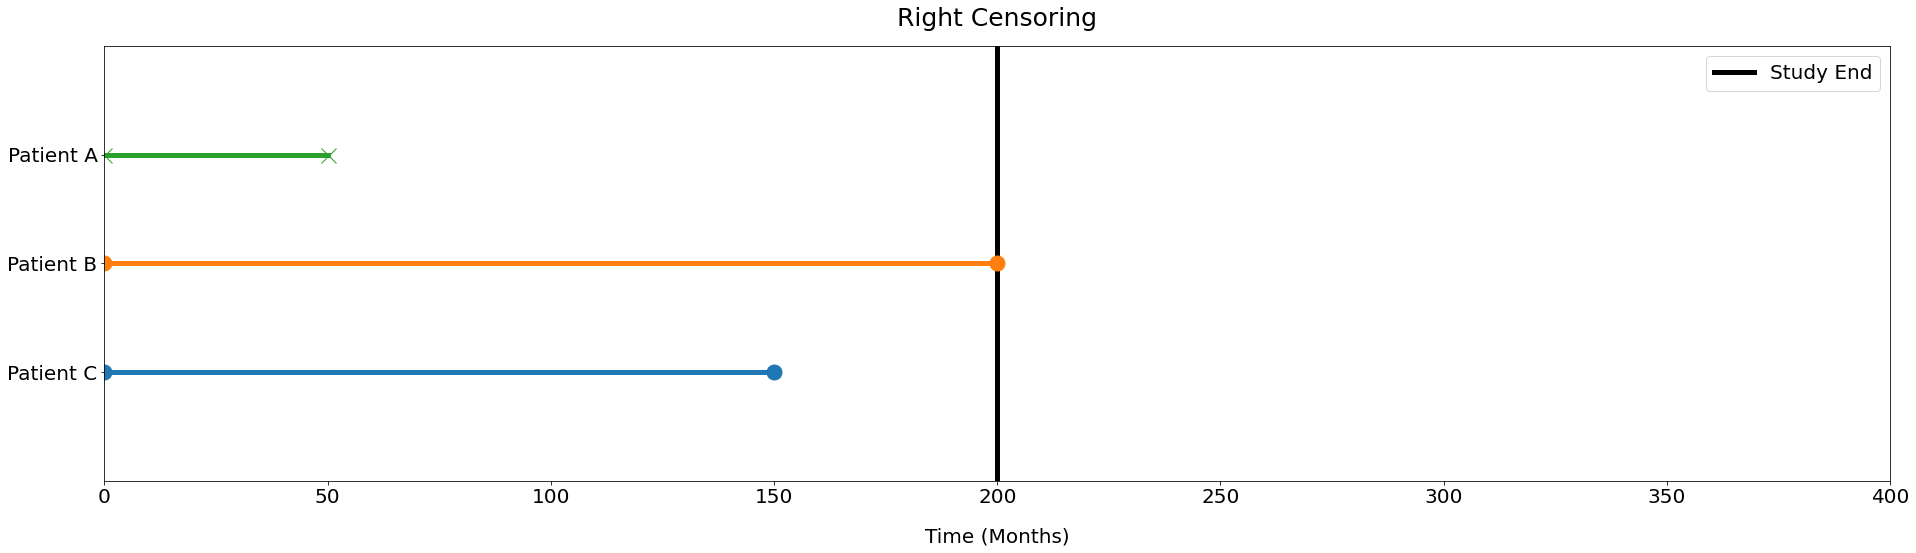

In [43]:
fig = plt.figure(figsize=(32, 8))

plt.xlim(0, 400), plt.ylim(0, 4)
plt.axvline(200, color='black', label='Study End', linewidth=5)
plt.plot([0, 150], [1, 1], marker='o', markersize=15, linewidth=5)
plt.plot([0, 200], [2, 2], marker='o', markersize=15, linewidth=5)
plt.plot([0, 50], [3, 3], marker='x', markersize=15, linewidth=5)

plt.xlabel('Time (Months)', size=20, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.yticks([1, 2, 3], ['Patient C', 'Patient B', 'Patient A'])
plt.legend(prop={'size': 20})
plt.title('Right Censoring', size=25, pad=20)

plt.show()

In [44]:
def time_dependent_roc_auc_score(y_true, y_pred, survival_times):

    """
    Calculate roc auc score at given times

    Parameters
    ----------
    y_true: array-like of shape (n_samples)
    Binary event vector
    y_pred: array-like of shape (n_samples, n_evaluation_times)
    Predicted event probabilities at given times
    survival_times: array-like of shape (n_samples)
    Continuous time vector

    Returns
    -------
    scores: dict (time: score)
    A dictionary of times and scores
    """

    time_dependent_y_true = pd.DataFrame(data=np.zeros((y_pred.shape[0], y_pred.shape[1])),
                                         index=y_true.index,
                                         columns=y_pred.columns,
                                         dtype=np.uint8)

    for i, time in enumerate(y_pred.columns):
        time_dependent_y_true.iloc[:, i] = ((y_true == 1) & (time >= survival_times)).astype(np.uint8)

    scores = {}
    for time in y_pred.columns:
        score = np.round(roc_auc_score(time_dependent_y_true[time], y_pred[time]), 6)
        scores[int(time)] = score

    return scores

# Survival Models

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold

# Assuming df_metabric is your DataFrame

# Split the data into training and testing sets
df_train, df_test = train_test_split(df_metabric,
                                     test_size=0.2,
                                     stratify=df_metabric['Cancer Type Detailed'],
                                     shuffle=True,
                                     random_state=0)

# Reset the index of the training and testing sets
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Perform stratified K-fold splitting
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
for fold, (_, val_idx) in enumerate(skf.split(df_train, df_train['Cancer Type Detailed']), 1):
    df_train.loc[val_idx, 'fold'] = fold

# Convert the 'fold' column to uint8 for efficient storage
df_train['fold'] = df_train['fold'].astype(np.uint8)


C:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


### Kaplan-Meier Estimate (Non-parametric Model) 

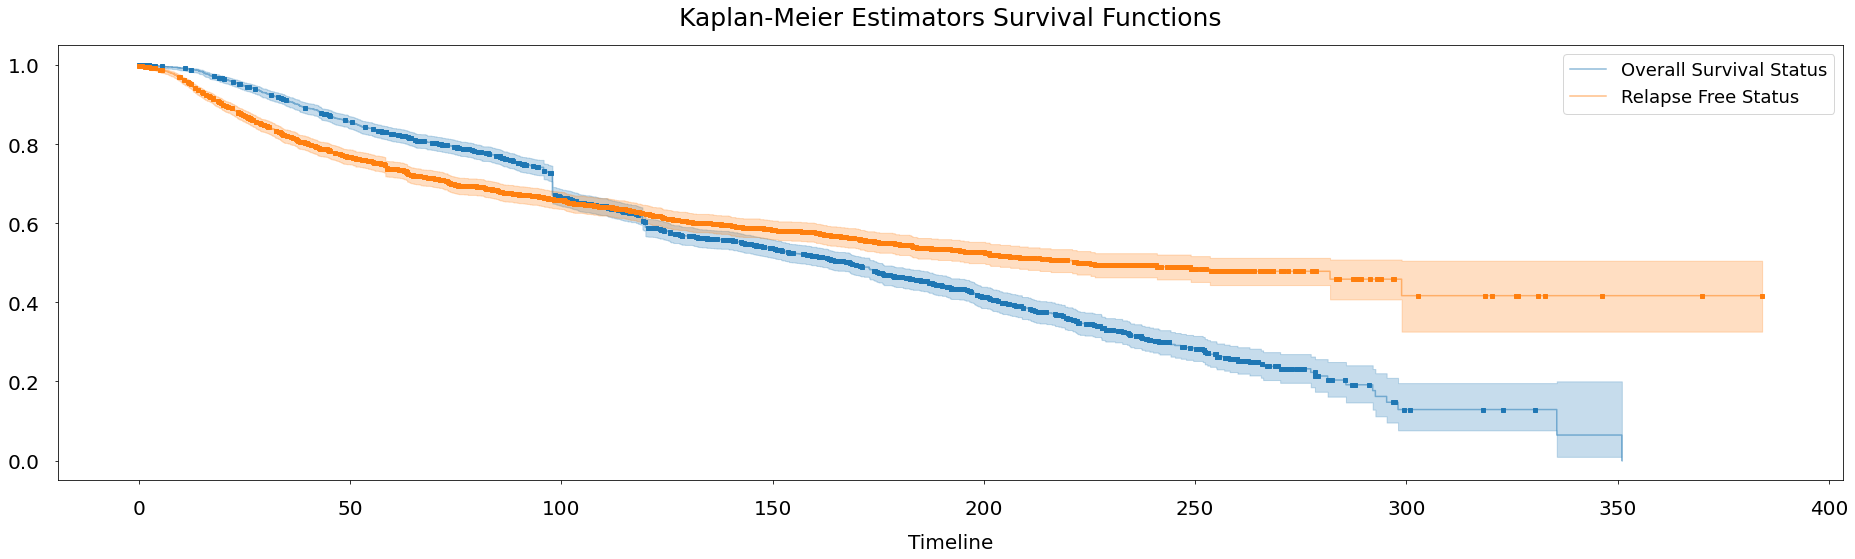

In [48]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming df_train is your DataFrame

fig = plt.figure(figsize=(32, 8))

for time, event in zip(['Overall Survival (Months)', 'Relapse Free Status (Months)'], ['Overall Survival Status', 'Relapse Free Status']):
    T, E = df_train[time], df_train[event]
    kmf = KaplanMeierFitter()
    kmf.fit(T, E)
    kmf.plot(label=event, alpha=0.5, show_censors=True, censor_styles={'ms': 4, 'marker': 's'})

plt.xlabel('Timeline', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=20, pad=15)
plt.tick_params(axis='y', labelsize=20, pad=15)
plt.legend(prop={'size': 18})
plt.title('Kaplan-Meier Estimators Survival Functions', size=25, pad=20)

plt.show()


Kaplan-meier estimate can also be used for predicting survival probabilities of unseen data at given times. lifelines.KaplanMeierFitter.predict function takes times parameter which is a list of timesteps to predict probabilities at. For example, the model below tries to predict both events happening (separately) at 12, 24, and 36 months. Model is evaluated on 5 split cross-validation and unseen test set.

0.5 Test ROC AUC scores suggest that Kaplan-Meier estimate fails to generalize on an unseen test set. That was expected because this model doesn't use patient covariates and it outputs same probabilities for every patient in the population. Besides low scores, Kaplan-Meier estimate doesn't output hazard rates, so it can't be evaluated with concordance index. That's why Kaplan-Meier estimate shouldn't be used for predictions, but it is very useful for exploratory data analysis

In [52]:
from sklearn.metrics import roc_auc_score




evaluation_times = [12, 24, 36]

for time, event in zip(['Overall Survival (Months)', 'Relapse Free Status (Months)'], ['Overall Survival Status', 'Relapse Free Status']):
    
    df_oof_survival_function = pd.DataFrame(data=np.zeros((df_train.shape[0], len(evaluation_times))),
                                                index=df_train.index,
                                                columns=evaluation_times)
    df_test_survival_function = pd.DataFrame(data=np.zeros((df_test.shape[0], len(evaluation_times))),
                                             index=df_test.index,
                                             columns=evaluation_times)
    
    for fold in sorted(df_train['fold'].unique()):
                    
        trn_idx, val_idx = df_train.loc[df_train['fold'] != fold].index, df_train.loc[df_train['fold'] == fold].index       
        T_trn, E_trn = df_train.loc[trn_idx, time], df_train.loc[trn_idx, event]
        T_val, E_val = df_train.loc[val_idx, time], df_train.loc[val_idx, event]
        kmf = KaplanMeierFitter()
        kmf.fit(T_trn, E_trn)
        
        survival_function = kmf.predict(times=evaluation_times)        
        val_survival_function = pd.DataFrame(data=np.transpose(np.tile(survival_function.values.reshape(-1, 1), T_val.shape[0])),
                                             index=val_idx,
                                             columns=evaluation_times)        
        df_oof_survival_function.loc[val_idx, :] = val_survival_function.values        
        test_survival_function = pd.DataFrame(data=np.transpose(np.tile(survival_function.values.reshape(-1, 1), df_test.shape[0])),
                                              index=df_test.index,
                                              columns=evaluation_times)
        df_test_survival_function += (test_survival_function.values / n_splits)

        val_auc = time_dependent_roc_auc_score(df_train.loc[val_idx, event], val_survival_function, df_train.loc[val_idx, time])
        print(f'Fold {fold} ({time}) - ROC AUC Scores {val_auc}')
        
    oof_auc = time_dependent_roc_auc_score(df_train[event], df_oof_survival_function, df_train[time])
    test_auc = time_dependent_roc_auc_score(df_test[event], df_test_survival_function, df_test[time])
    print(f'{"-" * 30}\nKaplan Meier Estimate {time} OOF AUC: {oof_auc}')
    print(f'Kaplan-Meier Estimate {time} Test AUC: {test_auc}\n{"-" * 30}\n')

Fold 1 (Overall Survival (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 2 (Overall Survival (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 3 (Overall Survival (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 4 (Overall Survival (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 5 (Overall Survival (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
------------------------------
Kaplan Meier Estimate Overall Survival (Months) OOF AUC: {12: 0.649796, 24: 0.524038, 36: 0.518953}
Kaplan-Meier Estimate Overall Survival (Months) Test AUC: {12: 0.5, 24: 0.5, 36: 0.5}
------------------------------

Fold 1 (Relapse Free Status (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 2 (Relapse Free Status (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 3 (Relapse Free Status (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 4 (Relapse Free Status (Months)) - ROC AUC Scores {12: 0.5, 24: 0.5, 36: 0.5}
Fold 5 (Relapse Fre

# Cox Proportional Hazards Model (Semi-parametric Model)

Cox proportional hazards model is essentially a regression model commonly used in medical research for investigating the association between the survival time of patients and one or more covariates. The method mentioned above, Kaplan-Meier estimate is an example of univariate analysis. It describes the survival according to one factor under investigation, but ignore the impact of any others (patient covariates). Univariate analysis methods are only useful when the covariates are categorical (e.g.: males vs females). They don’t work easily for continuous covariates such as "age at diagnosis".

An alternative method to Kaplan-Meier estimate is the Cox proportional hazards model. It works for both continuous and categorical variables. Furthermore, the Cox proportional hazards model extends survival analysis methods to assess simultaneously the effect of several risk factors on survival time.

In [56]:
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index

evaluation_times = [12, 24, 36]
os_covariates = ['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
                 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
                 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
                 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6',
                 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy',
                 'Inferred Menopausal State', 'Primary Tumor Laterality', 'Lymph nodes examined positive',
                 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'PR Status',
                 '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage']
rfs_covariates = ['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
                 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
                 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
                 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6',
                 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy',
                 'Inferred Menopausal State', 'Primary Tumor Laterality', 'Lymph nodes examined positive',
                 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'PR Status',
                 '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage']

for time, event, covariates in zip(['Overall Survival (Months)', 'Relapse Free Status (Months)'],
                                   ['Overall Survival Status', 'Relapse Free Status'],
                                   [os_covariates, rfs_covariates]):
    
    df_oof_survival_function = pd.DataFrame(data=np.zeros((df_train.shape[0], len(evaluation_times))), index=df_train.index, columns=evaluation_times)
    df_oof_hazard_rates = pd.DataFrame(data=np.zeros(df_train.shape[0]), index=df_train.index, columns=['Partial Hazard Rates'])
    df_test_survival_function = pd.DataFrame(data=np.zeros((df_test.shape[0], len(evaluation_times))), index=df_test.index, columns=evaluation_times)
    df_test_hazard_rates = pd.DataFrame(data=np.zeros(df_test.shape[0]), index=df_test.index, columns=['Partial Hazard Rates'])
    
    for fold in sorted(df_train['fold'].unique()):
                    
        trn_idx, val_idx = df_train.loc[df_train['fold'] != fold].index, df_train.loc[df_train['fold'] == fold].index       
        trn = df_train.loc[trn_idx, covariates + [time, event]]
        val = df_train.loc[val_idx, covariates + [time, event]]
        
        cph = CoxPHFitter(baseline_estimation_method='breslow',
                          n_baseline_knots=4,
                          penalizer=1e-2)
        cph.fit(trn, duration_col=time, event_col=event)
        
        val_survival_function = cph.predict_survival_function(val, times=evaluation_times).T
        test_survival_function = cph.predict_survival_function(df_test[covariates + [time, event]], times=evaluation_times).T
        df_oof_survival_function.loc[val_idx, :] = val_survival_function.values
        df_test_survival_function += (test_survival_function.values / n_splits)
        
        df_oof_hazard_rates.loc[val_idx, 'Partial Hazard Rates'] = -cph.predict_partial_hazard(val[covariates + [time, event]])
        df_test_hazard_rates[f'Partial Hazard Rates'] += -cph.predict_partial_hazard(df_test[covariates + [time, event]])

        val_auc = time_dependent_roc_auc_score(df_train.loc[val_idx, event], val_survival_function, df_train.loc[val_idx, time])
        val_ci = concordance_index(df_train.loc[val_idx, time], df_oof_hazard_rates.loc[val_idx, 'Partial Hazard Rates'], df_train.loc[val_idx, event])
        print(f'Fold {fold} ({time}) - ROC AUC Scores {val_auc} - Concordance Index: {val_ci:.6}')
        
    oof_auc = time_dependent_roc_auc_score(df_train[event], df_oof_survival_function, df_train[time])
    oof_ci = concordance_index(df_train[time], df_oof_hazard_rates['Partial Hazard Rates'], df_train[event])
    test_auc = time_dependent_roc_auc_score(df_test[event], df_test_survival_function, df_test[time])
    test_ci = concordance_index(df_test[time], df_test_hazard_rates['Partial Hazard Rates'], df_test[event])
    print(f'{"-" * 30}\nCox Proportional Hazards Model {time} - OOF ROC AUC Scores: {oof_auc} - Concordance Index: {oof_ci:.6}')
    print(f'Cox Proportional Hazards Model {time} - Test ROC AUC Scores: {test_auc} - Concordance Index: {test_ci:.6}\n{"-" * 30}\n')

Fold 1 (Overall Survival (Months)) - ROC AUC Scores {12: 0.39875, 24: 0.213252, 36: 0.264421} - Concordance Index: 0.686912
Fold 2 (Overall Survival (Months)) - ROC AUC Scores {12: 0.304094, 24: 0.265631, 36: 0.267835} - Concordance Index: 0.670948
Fold 3 (Overall Survival (Months)) - ROC AUC Scores {12: 0.110553, 24: 0.319118, 36: 0.316472} - Concordance Index: 0.665637
Fold 4 (Overall Survival (Months)) - ROC AUC Scores {12: 0.144841, 24: 0.214286, 36: 0.230468} - Concordance Index: 0.667443
Fold 5 (Overall Survival (Months)) - ROC AUC Scores {12: 0.10211, 24: 0.24814, 36: 0.250585} - Concordance Index: 0.670028
------------------------------
Cox Proportional Hazards Model Overall Survival (Months) - OOF ROC AUC Scores: {12: 0.210905, 24: 0.252653, 36: 0.265954} - Concordance Index: 0.672114
Cox Proportional Hazards Model Overall Survival (Months) - Test ROC AUC Scores: {12: 0.288889, 24: 0.283471, 36: 0.234914} - Concordance Index: 0.656571
------------------------------

Fold 1 (Re